In [1]:
#Importing the needed packages.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew
pd.options.display.float_format = "{:.2f}".format
from imblearn.over_sampling import SMOTE
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Reading the data file downloaded from UCI.
data = pd.read_csv("C:\\Users\\CHARL\\OneDrive\\Documents\\City Uni Data Science modules\\neural networks\\bank-full.csv", sep=",|;", engine = 'python', header=None)
print(data)

          0               1           2            3          4          5   \
0      "age"           "job"   "marital"  "education"  "default"  "balance"   
1         58    "management"   "married"   "tertiary"       "no"       2143   
2         44    "technician"    "single"  "secondary"       "no"         29   
3         33  "entrepreneur"   "married"  "secondary"       "no"          2   
4         47   "blue-collar"   "married"    "unknown"       "no"       1506   
...      ...             ...         ...          ...        ...        ...   
45207     51    "technician"   "married"   "tertiary"       "no"        825   
45208     71       "retired"  "divorced"    "primary"       "no"       1729   
45209     72       "retired"   "married"  "secondary"       "no"       5715   
45210     57   "blue-collar"   "married"  "secondary"       "no"        668   
45211     37  "entrepreneur"   "married"  "secondary"       "no"       2971   

              6       7            8      9        

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,"""age""","""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
1,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
2,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
3,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
4,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""


In [4]:
#Resetting the index and locking the correct rows in the dataframe.
data = data.iloc[1:45212]
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
2,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
3,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
4,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
5,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45208,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45209,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45210,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [5]:
# renanimg the columns in the dataframe.
data = data.rename(columns={0: 'Age', 1: 'Job', 2: 'Martital', 3: 'Education', 4: 'Defualt', 5: 'Balance', 6: 'Housing', 7: 'Loan', 8: 'Contact', 9: 'Day', 10: 'Month', 11: 'Duration', 12: 'Campaign', 13: 'pdays', 14: 'Previous', 15: 'poutcome', 16: 'y' })
print(data)

      Age             Job    Martital    Education Defualt Balance Housing  \
1      58    "management"   "married"   "tertiary"    "no"    2143   "yes"   
2      44    "technician"    "single"  "secondary"    "no"      29   "yes"   
3      33  "entrepreneur"   "married"  "secondary"    "no"       2   "yes"   
4      47   "blue-collar"   "married"    "unknown"    "no"    1506   "yes"   
5      33       "unknown"    "single"    "unknown"    "no"       1    "no"   
...    ..             ...         ...          ...     ...     ...     ...   
45207  51    "technician"   "married"   "tertiary"    "no"     825    "no"   
45208  71       "retired"  "divorced"    "primary"    "no"    1729    "no"   
45209  72       "retired"   "married"  "secondary"    "no"    5715    "no"   
45210  57   "blue-collar"   "married"  "secondary"    "no"     668    "no"   
45211  37  "entrepreneur"   "married"  "secondary"    "no"    2971    "no"   

        Loan      Contact Day  Month Duration Campaign pdays Pr

In [6]:
data.head()

,Age,Job,Martital,Education,Defualt,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,pdays,Previous,poutcome,y
1,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
2,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
3,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
4,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
5,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [7]:
#Getting rid of the commas and quote marks in the dataframe.
data = data.applymap(lambda x: x.replace('"', ''))
data.head()

,Age,Job,Martital,Education,Defualt,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,pdays,Previous,poutcome,y
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
#replacing classfiers factor outcomes (y column) with integers
data.loc[data["y"] == "yes", "y"] = 1
data.loc[data["y"] == "no", "y"] = 0

In [9]:
#Dropping uneeded columns in the dataframe
data = data.drop(columns= ["Job", "Martital", "Education", "Defualt", "Housing", "Loan", "Contact", "Month", "poutcome"])

In [10]:
data

,Age,Balance,Day,Duration,Campaign,pdays,Previous,y
1,58,2143,5,261,1,-1,0,0
2,44,29,5,151,1,-1,0,0
3,33,2,5,76,1,-1,0,0
4,47,1506,5,92,1,-1,0,0
5,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45207,51,825,17,977,3,-1,0,1
45208,71,1729,17,456,2,-1,0,1
45209,72,5715,17,1127,5,184,3,1
45210,57,668,17,508,4,-1,0,0


In [11]:
#coverting numpy objects to floats in order to work with pytorch libary
data["Age"] = data.Age.astype(float)
data["Balance"] = data.Balance.astype(float)
data["Day"] = data.Day.astype(float)
data["Duration"] = data.Duration.astype(float)
data["Campaign"] = data.Campaign.astype(float)
data["pdays"] = data.pdays.astype(float)
data["Previous"] = data.Previous.astype(float)
data["y"] = data.y.astype(float)
data

,Age,Balance,Day,Duration,Campaign,pdays,Previous,y
1,58.00,2143.00,5.00,261.00,1.00,-1.00,0.00,0.00
2,44.00,29.00,5.00,151.00,1.00,-1.00,0.00,0.00
3,33.00,2.00,5.00,76.00,1.00,-1.00,0.00,0.00
4,47.00,1506.00,5.00,92.00,1.00,-1.00,0.00,0.00
5,33.00,1.00,5.00,198.00,1.00,-1.00,0.00,0.00
...,...,...,...,...,...,...,...,...
45207,51.00,825.00,17.00,977.00,3.00,-1.00,0.00,1.00
45208,71.00,1729.00,17.00,456.00,2.00,-1.00,0.00,1.00
45209,72.00,5715.00,17.00,1127.00,5.00,184.00,3.00,1.00
45210,57.00,668.00,17.00,508.00,4.00,-1.00,0.00,0.00


In [12]:
#Getting the basic stats of the dataframe
data.describe()

,Age,Balance,Day,Duration,Campaign,pdays,Previous,y
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58,0.12
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30,0.32
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00,1.00


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'Previous'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

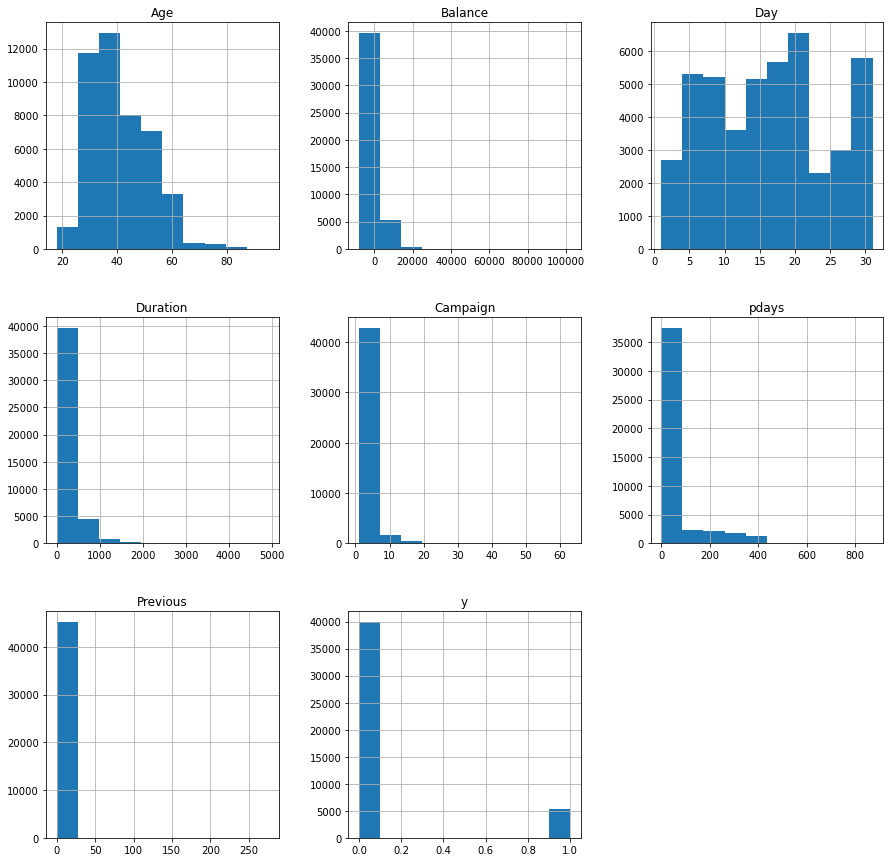

In [13]:
#visualising the distribution of the seven main varibles
from matplotlib import rcParams
rcParams['figure.figsize'] = 15 , 15
data.hist()

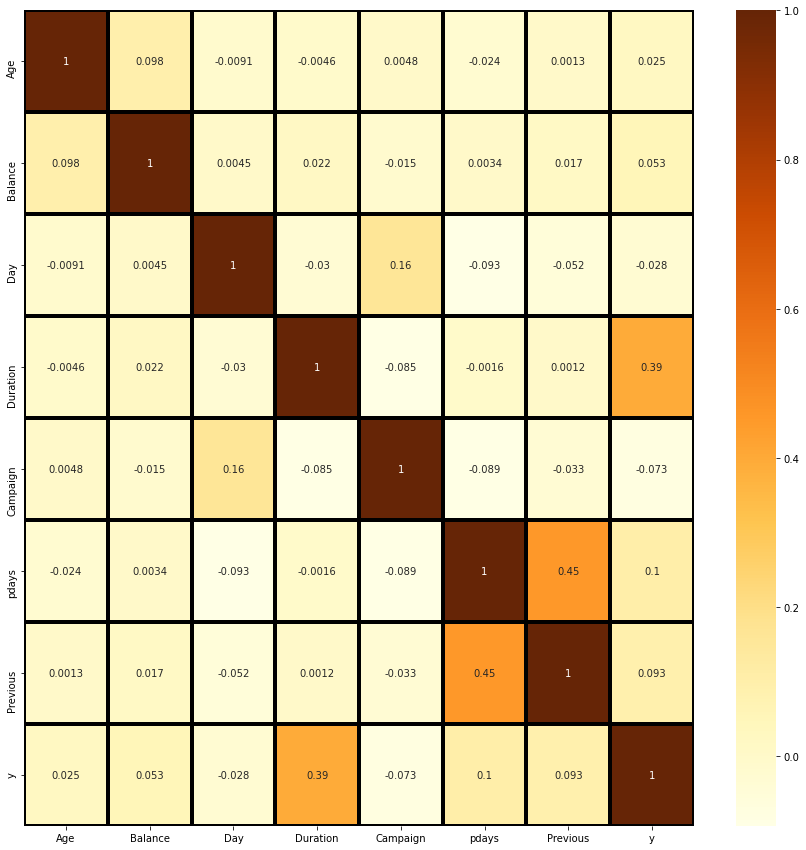

In [14]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True, cmap= "YlOrBr", linewidths=3, linecolor='black')
plt.show()

In [15]:
smote = SMOTE()
#looking at df shape
print(data.shape)

(45211, 8)


In [16]:
#looking at the data points in the df
print(data["y"].value_counts())

0.00    39922
1.00     5289
Name: y, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
x = data.iloc[:, 0:7] #df predictors
y = data.iloc[:, 7] #repsonse variable to the predictors in df

In [20]:
x

,Age,Balance,Day,Duration,Campaign,pdays,Previous
1,58.00,2143.00,5.00,261.00,1.00,-1.00,0.00
2,44.00,29.00,5.00,151.00,1.00,-1.00,0.00
3,33.00,2.00,5.00,76.00,1.00,-1.00,0.00
4,47.00,1506.00,5.00,92.00,1.00,-1.00,0.00
5,33.00,1.00,5.00,198.00,1.00,-1.00,0.00
...,...,...,...,...,...,...,...
45207,51.00,825.00,17.00,977.00,3.00,-1.00,0.00
45208,71.00,1729.00,17.00,456.00,2.00,-1.00,0.00
45209,72.00,5715.00,17.00,1127.00,5.00,184.00,3.00
45210,57.00,668.00,17.00,508.00,4.00,-1.00,0.00


array([0, 0, 0, ..., 1, 1, 1])

In [25]:
#normalising the x label data then applying the smote technique to the x and y label data.
from sklearn.preprocessing import normalize
x = normalize(x)
y = np.array(y)
y = y.astype(int)
x_train_smote, y_train_smote = smote.fit_sample(x.astype(float), y)

In [31]:
num_zeros = (y_train_smote == 0).sum()
num_ones = (y_train_smote == 1).sum() 
print(num_zeros)
print(num_ones)

39922
39922


In [21]:
#splitting the training and testing data with a test size of 30%
x_train, x_test, y_train, y_test = train_test_split(x_train_smote, y_train_smote, test_size = 0.30, random_state = 1)
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (55890, 7)
y_train shape:  (55890,)
x_test shape:  (23954, 7)
y_test shape:  (23954,)


In [22]:
from torch import optim 
import torch 
import torch.nn as nn

In [23]:
#two hidden layer and one output layer (multilayer percrptrons) to train a classification problem
model = nn.Sequential(nn.Linear(7, 70),
                      nn.ReLU(),
                      nn.Linear(70, 30),
                      nn.ReLU(),
                      nn.Linear(30, 2),
                      nn.LogSoftmax( dim= 1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [24]:
print(model) #model summary

Sequential(
  (0): Linear(in_features=7, out_features=70, bias=True)
  (1): ReLU()
  (2): Linear(in_features=70, out_features=30, bias=True)
  (3): ReLU()
  (4): Linear(in_features=30, out_features=2, bias=True)
  (5): LogSoftmax(dim=1)
)


In [25]:
#creating a prediction function to predict classess
def predict(model, inputs):
    output = model(inputs)
    return output.data.numpy().argmax(axis=1)

In [26]:
#creating torch tensors base data that can be used for training
x_train = torch.from_numpy(x_train).float()
x_test = torch.from_numpy(x_test).float()
y_train = torch.from_numpy(y_train).long()

In [27]:
#Executing the nn model

epochs = 5000
batch_size = 30
n_batches = 18

costs = []
test_accuracies = []
for e in range(epochs):
    running_loss = 0
    for j in range(n_batches):
        xbatch = x_train[j*batch_size: (j+1)*batch_size]
        ybatch = y_train[j*batch_size: (j+1)*batch_size]
        
        optimizer.zero_grad()
        output = model(xbatch)
        loss = criterion(output, ybatch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    Ypred = predict(model, x_test)
    
    acc = np.mean(y_test ==Ypred)
    
    print("Epoch: %d, cost: %f, accuracy: %.2f", (e, running_loss/n_batches))
    costs.append(running_loss/n_batches)
    test_accuracies.append(acc)

C:\Users\CHARL\anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


Epoch: %d, cost: %f, accuracy: %.2f (0, 0.7003088593482971)
Epoch: %d, cost: %f, accuracy: %.2f (1, 0.6981880499256982)
Epoch: %d, cost: %f, accuracy: %.2f (2, 0.6966391570038266)
Epoch: %d, cost: %f, accuracy: %.2f (3, 0.6954932610193888)
Epoch: %d, cost: %f, accuracy: %.2f (4, 0.694621354341507)
Epoch: %d, cost: %f, accuracy: %.2f (5, 0.6939524180359311)
Epoch: %d, cost: %f, accuracy: %.2f (6, 0.6934329834249284)
Epoch: %d, cost: %f, accuracy: %.2f (7, 0.6930240591367086)
Epoch: %d, cost: %f, accuracy: %.2f (8, 0.6926845113436381)
Epoch: %d, cost: %f, accuracy: %.2f (9, 0.6923949552906884)
Epoch: %d, cost: %f, accuracy: %.2f (10, 0.692142559422387)
Epoch: %d, cost: %f, accuracy: %.2f (11, 0.6919130716058943)
Epoch: %d, cost: %f, accuracy: %.2f (12, 0.6917021407021416)
Epoch: %d, cost: %f, accuracy: %.2f (13, 0.6915043228202395)
Epoch: %d, cost: %f, accuracy: %.2f (14, 0.6913141773806678)
Epoch: %d, cost: %f, accuracy: %.2f (15, 0.6911347773340013)
Epoch: %d, cost: %f, accuracy: %.2f 

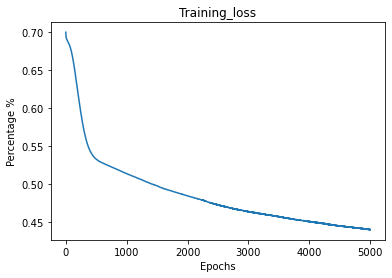

In [28]:
#Plotting training loss
%matplotlib inline

plt.plot(costs)
plt.title("Training_loss")
plt.ylabel("Percentage %")
plt.xlabel("Epochs")
plt.show()

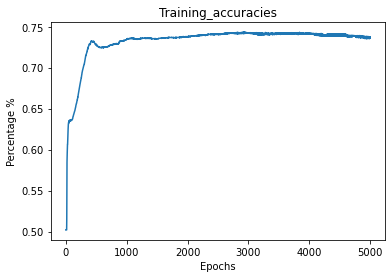

In [29]:
#plotting Training accuracies
plt.plot(test_accuracies)
plt.title("Training_accuracies")
plt.ylabel("Percentage %")
plt.xlabel("Epochs")
plt.show()

In [30]:
#getting the accuracy score of the model
from sklearn.metrics import accuracy_score
ypred = predict(model, x_test)
print("Accuracy Score is {}".format(accuracy_score(y_test, ypred)))

Accuracy Score is 0.7358687484344995


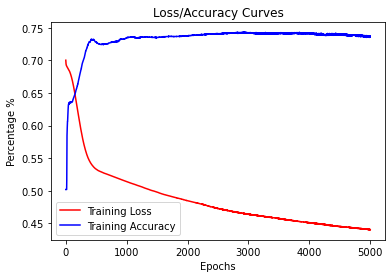

In [31]:
#Plotting Training and loss curves together
%matplotlib inline
plt.plot(costs, color='red', label='Training Loss')
plt.plot(test_accuracies, color='blue', label='Training Accuracy')
plt.title("Loss/Accuracy Curves")
plt.ylabel("Percentage %")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [32]:
#Creating classfication report
from sklearn.metrics import classification_report
target_names = ['No', 'Yes']
print(classification_report(y_test, ypred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.80      0.64      0.71     12025
         Yes       0.69      0.84      0.76     11929

    accuracy                           0.74     23954
   macro avg       0.75      0.74      0.73     23954
weighted avg       0.75      0.74      0.73     23954



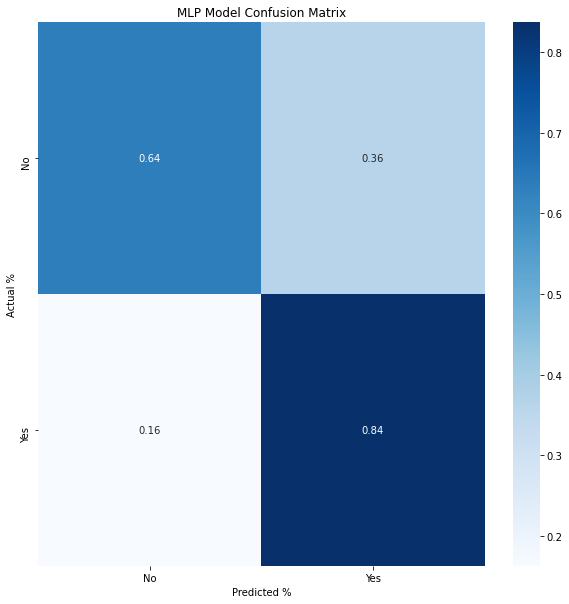

In [33]:
#Creating a confusion  matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['figure.figsize'] = 10 , 10
cmn = confusion_matrix(y_test, ypred)
cmn = cmn.astype('float') / cmn.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.ylabel('Actual %')
plt.xlabel('Predicted %')
plt.title("MLP Model Confusion Matrix")
plt.show(block=False)

In [34]:
#Creating ROC curve
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, ypred)
roc_auc = metrics.auc(fpr, tpr)

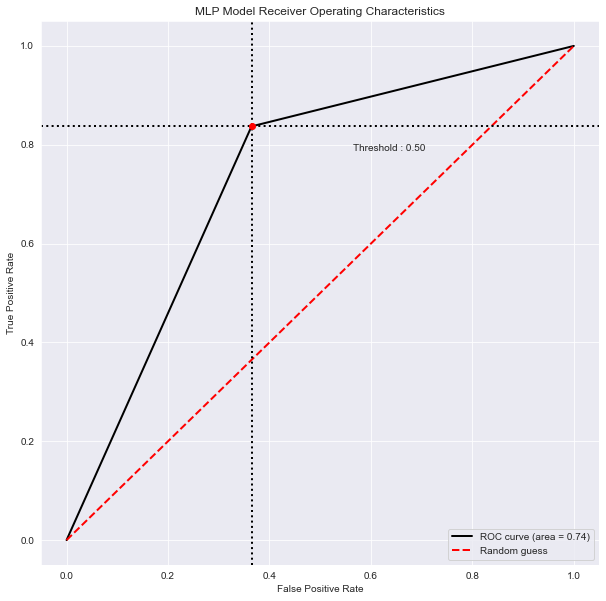

In [35]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred, labels=["Class 1", "Class 2"])
# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.title("MLP Model Receiver Operating Characteristics")
plt.show()

In [61]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train_smote, y_train_smote, test_size = 0.30)

In [62]:
#creating the svm comparison model using the same data as the MLP model
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(x_train, y_train)

SVC(degree=8, kernel='poly')

In [63]:
y_pred2 = svclassifier.predict(x_test2)

In [64]:
#Creating classfication report
from sklearn.metrics import classification_report
target_names = ['No', 'Yes']
print(classification_report(y_test2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

          No       0.76      0.75      0.75     11954
         Yes       0.75      0.76      0.76     12000

    accuracy                           0.76     23954
   macro avg       0.76      0.76      0.76     23954
weighted avg       0.76      0.76      0.76     23954



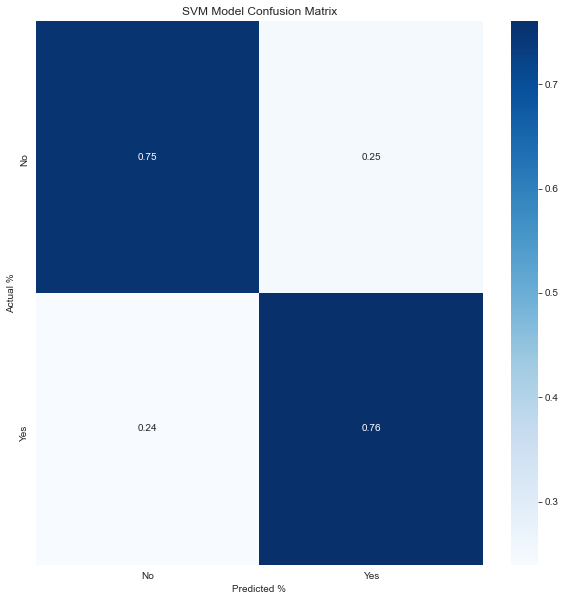

In [65]:
#Creating a confusion  matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['figure.figsize'] = 10 , 10
cmn = confusion_matrix(y_test2, y_pred2)
cmn = cmn.astype('float') / cmn.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.ylabel('Actual %')
plt.xlabel('Predicted %')
plt.title("SVM Model Confusion Matrix")
plt.show(block=False)

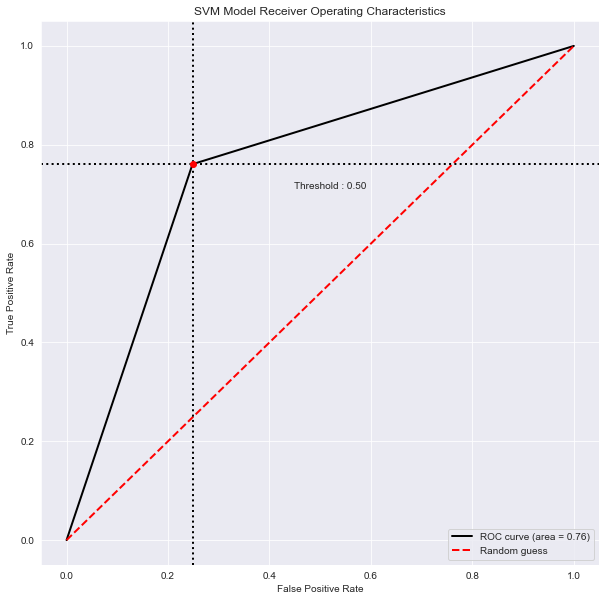

In [66]:
#plotting ROC curve and AUC 
# Visualisation with plot_metric
bc = BinaryClassification(y_test2, y_pred2, labels=["Class 1", "Class 2"])
# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.title("SVM Model Receiver Operating Characteristics")
plt.show()

In [59]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
title = r"Learning Curves (SVM, poly kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = SVC(gamma='scale')
plot_learning_curve(estimator, title, x_train_smote[:40000], y_train_smote[:40000], axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)